<a href="https://colab.research.google.com/github/Zaedul-Islam/Introduction_to_Data_Visualization_in_Python/blob/master/Cereal/Cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical Clustering on Cereal Data**

## **Importing the libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Seaborn is a python library for visualizing data. It is built on top of matplotlib and closely integrated with pandas data structure
import seaborn as sns

# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

# Taking care of missing data
from sklearn.impute import SimpleImputer

from sklearn.cluster import AgglomerativeClustering

from IPython.display import Image

# Some setting for this notebook to actually show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## **Reading 'cereal' dataset**

In [243]:
filepath = '/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/Cereal/Dataset/cereal-updated.csv'
dataset = pd.read_csv(filepath)

dataset.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843


In [244]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cereals   77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     77 non-null     float64
 7   sugars    77 non-null     int64  
 8   potass    75 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  rating    77 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB


**Findings:**
1.  The *cereal* dataset contains 12 columns and 77 rows, but no missing values.
2. ***potass*** column has 2 missing values

## **Fill up the missing values in potass variable**

In [245]:
# Filling up the missing cells by taking the mean of 'potass' column
dataset['potass'].fillna(dataset['potass'].mean(), inplace=True)
dataset.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.000000,25,3,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.000000,0,3,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320.000000,25,3,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.000000,25,3,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8,98.666667,25,3,34.384843


In [246]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cereals   77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     77 non-null     float64
 7   sugars    77 non-null     int64  
 8   potass    77 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  rating    77 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB


## **Finding the number of clusters from Dendrogram**

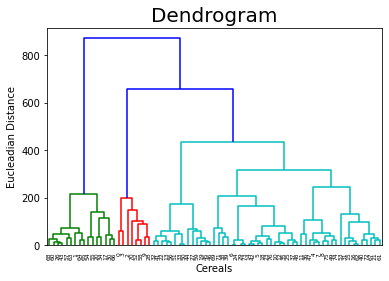

In [247]:
X = dataset.iloc[:, 2:12].values

# linkage - is actually the algorithm itself of Hierarchical Clustering. 
# 1st parameter (To which data we'll apply the linkage), 
# 2nd parameter (Method that is used to find the clusters.)
# 'ward' - It tries to minimize the variance within each cluster. Just like, in K-Means we're trying to minimize the WISS to 
# plot the Elbow Method chart. This is almost same, the only difference is that instead of minimizing the WISS we're minimizing the within cluster variance. 

# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Cereals')
# The vertical lines in the dendromgram are the distances between the clusters that is between the centroids of the clusters 
plt.ylabel('Eucleadian Distance')
plt.show()

## **Dendrogram with Cutting Point**

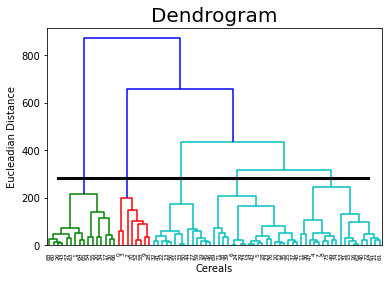

In [248]:
# Display dendrogram with the cutting point
Image('/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/Cereal/Visualization/Cereals vs Eucledean Distance.jpeg', width = 600, height = 400)

**Findings:**
1. From the dendrogram, the largest distance that we can make vertically without the crossing any horinzontal line is the Blue one. If we draw a horizontal line as in the image, we'll get ***5*** clusters.

## **Fitting Hierarchical Clustering to the Cereals**

In [262]:
# affinity - The distance to the linkage
# linkage = 'ward' - Try to minimize the variance in each of the clusters
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset.iloc[:, 2: 12].values)


array([2, 1, 2, 2, 0, 4, 4, 0, 0, 2, 4, 0, 4, 3, 4, 0, 0, 1, 4, 3, 1, 0,
       3, 4, 4, 4, 1, 3, 2, 4, 1, 0, 3, 3, 1, 4, 0, 4, 4, 4, 0, 3, 4, 1,
       3, 3, 3, 0, 4, 0, 3, 3, 2, 0, 1, 1, 3, 1, 2, 3, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 4, 2, 4, 0, 4, 0, 0, 4])

## **Questions & Answers**

### 1. Is a strong correlation between dietary fiber and potassium?

1. Plotting *fiber* in x-axis and *potass* in y-axis of a Scatter Diagram

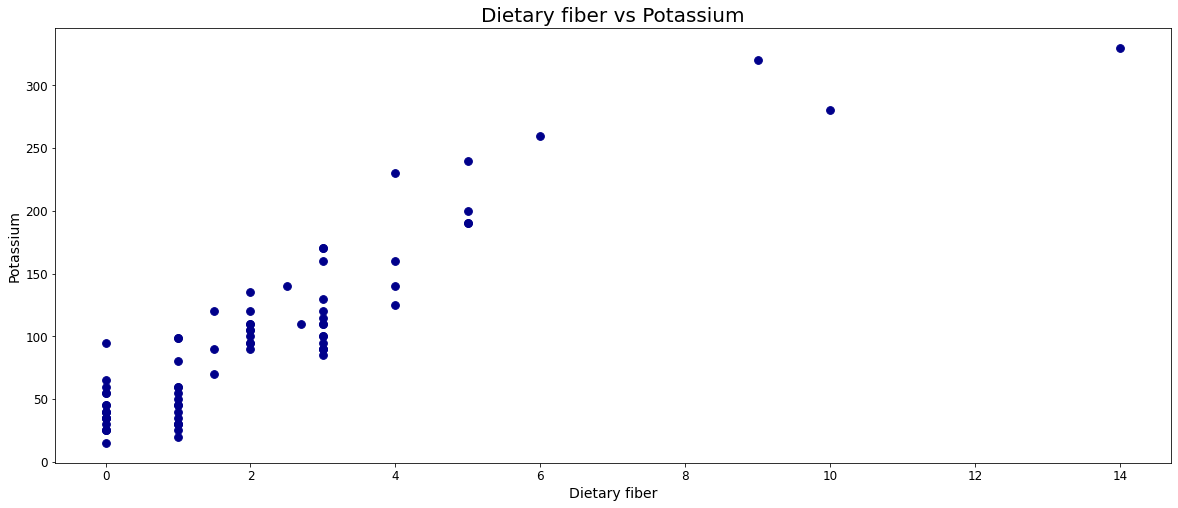

In [249]:
dataset.plot(x = 'fiber', y = 'potass', kind = 'scatter', figsize = (20, 8), title = 'Dietary fiber vs Potassium', fontsize = 12, c = 'DarkBlue',  s = 60)

plt.xlabel('Dietary fiber', fontsize = 14)
plt.ylabel('Potassium', fontsize = 14)
plt.rcParams['axes.titlesize'] = 20

# To show the Scatter Diagram
plt.show()

**Findings:**
1. Yes, there is a strong correlation between dietary fiber and potassium. Examining the plot area in the graph, the points produce a lower-left-to-upper-right pattern (see below), which shows a positive correlation between dietary fiber and potassium to be specific. This pattern means that when the score of one observation is high, we expect the score of the other observation to be high as well, and vice versa. The below Scatter plot shows the correlation,

> `DataFrame.corr(self, method='pearson', min_periods=1) → 'DataFrame'` |
> Compute pairwise correlation of columns, excluding NA/null values.

A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.

**Method of correlation:**
* **pearson**: standard correlation coefficient
* **kendall**: Kendall Tau correlation coefficient
* **spearman**: Spearman rank correlation

In [250]:
# method='pearson'
pearsonCorrelation = dataset['fiber'].corr(dataset['potass'], method='pearson')
print("pearson: ", pearsonCorrelation)

# method='kendall'
kendallCorrelation = dataset['fiber'].corr(dataset['potass'], method='kendall')
print("kendall: ", kendallCorrelation)

# method='spearman'
spearmanCorrelation = dataset['fiber'].corr(dataset['potass'], method='spearman')
print("spearman: ", spearmanCorrelation)

pearson:  0.9086465981087963
kendall:  0.7141040654515343
spearman:  0.8583151350059549


**Findings:**
1. Using all 3 methods to find correlation bewteen *fiber* and *potass*, it's clearly evident that there’s a very strong positive correlation between them.

### 2. See other correlation between the data given in the files.

In [251]:
# Calculating the Pearson Correlation
pearsonCorrelation = dataset.corr(method = 'pearson')

pearsonCorrelation

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.071991,0.265356,0.097234,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.562143,0.007335,0.133865,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.197823,-0.031156,0.263691,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.042312,0.361477,-0.069719,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.908647,-0.032243,0.297539,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.333181,0.258148,-0.101790,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,-0.002556,0.125137,0.100438,-0.759675
potass,-0.071991,0.562143,0.197823,-0.042312,0.908647,-0.333181,-0.002556,1.000000,-0.005368,0.383303,0.408320
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,-0.005368,1.000000,0.299262,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.383303,0.299262,1.000000,0.025159


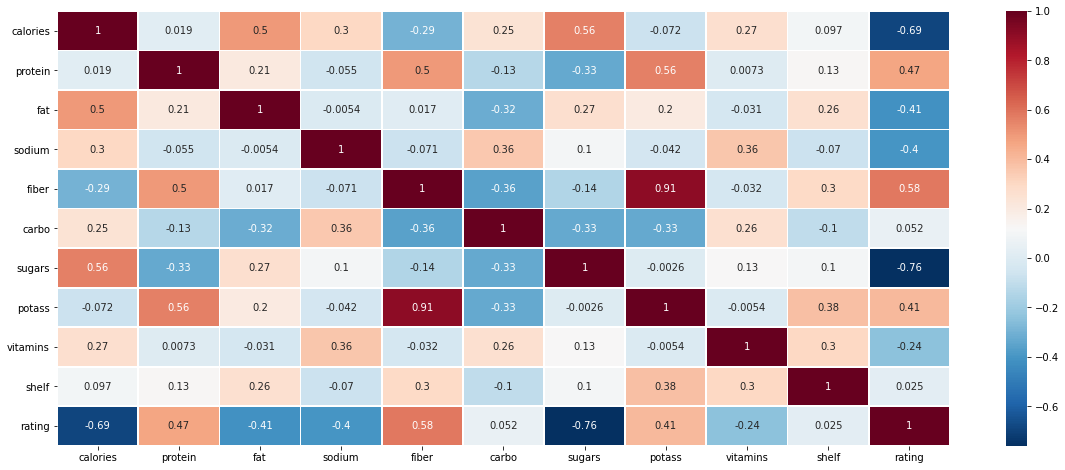

In [252]:
# To make that look better and easier to interpret, we'll heapmap to better visualize the Pearson correlation coefficient matrix
# A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

plt.figure(figsize = (20, 8))

sns.heatmap(pearsonCorrelation, 
            xticklabels=pearsonCorrelation.columns,
            yticklabels=pearsonCorrelation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

**Results and Interpretation:**

A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the maroon shows very strong correlations. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

**Findings:**
* **Positive Correlation:**
> 1. calories -> fat
> 2. sugars -> calories
> 2. potass -> protein
> 4. fiber -> rating

* **Negative Correlation:**
> 1. vitamins -> fat, fiber, potass

### 3. Try to find some other information

1. Plot 'shelf' & 'sugars' data in x-axis and y-axis respectively 

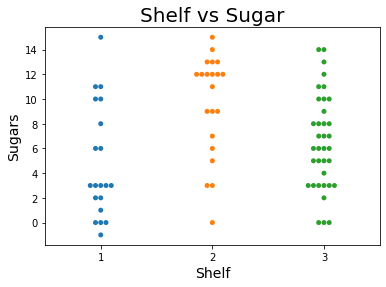

In [253]:
sns.swarmplot(x = dataset['shelf'], y = dataset['sugars'], data = dataset)

plt.xlabel('Shelf', fontsize = 14)
plt.ylabel('Sugars', fontsize = 14)
plt.title('Shelf vs Sugar')
plt.rcParams['axes.titlesize'] = 20

plt.show()

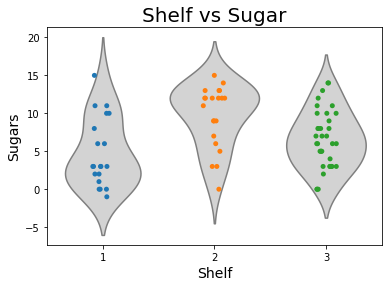

In [254]:
# Plot 'shelf' & 'sugars' data in x-axis and y-axis respectively 
sns.violinplot(x = dataset['shelf'], y = dataset['sugars'], data = dataset, inner = None, color = 'lightgray')
sns.stripplot(x = dataset['shelf'], y = dataset['sugars'], data = dataset, size = 5, jitter = True)

plt.xlabel('Shelf', fontsize = 14)
plt.ylabel('Sugars', fontsize = 14)
plt.title('Shelf vs Sugar')
plt.rcParams['axes.titlesize'] = 20

plt.show()

2. Plot 'shelf' & 'rating' data in x-axis and y-axis respectively 

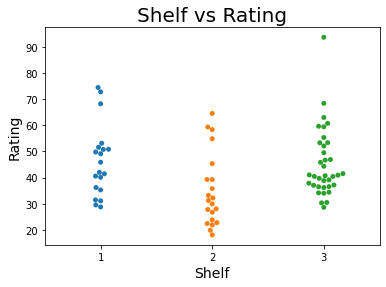

In [255]:
# Plot 'shelf' & 'ratings' data in x-axis and y-axis respectively 
sns.swarmplot(x = dataset['shelf'], y = dataset['rating'], data = dataset)

plt.xlabel('Shelf', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.title('Shelf vs Rating')
plt.rcParams['axes.titlesize'] = 20

plt.show()

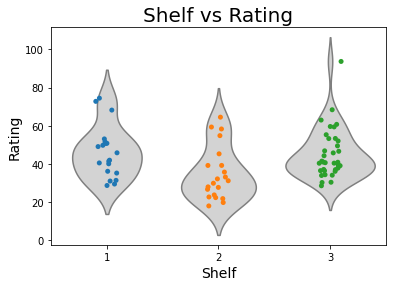

In [256]:
# Plot 'shelf' & 'ratings' data in x-axis and y-axis respectively 
sns.violinplot(x = dataset['shelf'], y = dataset['rating'], data = dataset, inner = None, color = 'lightgray')
sns.stripplot(x = dataset['shelf'], y = dataset['rating'], data = dataset, size = 5, jitter = True)

plt.xlabel('Shelf', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.title('Shelf vs Rating')
plt.rcParams['axes.titlesize'] = 20

plt.show()

**Findings:**
1. ***Shelf 2*** has more sugary cereals than other two shelfs.This might be interpreted as a marketing strategy. Young people and kids like ***sugary*** foods. As those are in ***shelf 2***, they find it easier to have  more sugary cereals thus craving the endorphins. 
2. On the other hand, patients of diabetes or people who want to avoid suger in their meals can pick from the ***shelf 3*** as it has several types of cereals containing *less sugar*. Older people are usually more concerned about their diet and health. So, here  plays a simple psychological trick. ***Shelf 3*** also keeps cereals that have better ratings calculated from  customer reports. The They feel good when they find their expected cereals after passing the ***shelf 1, 2*** 
and it gives them a sense of accomplishment.